# U.S. Presidential Election state & county maps (2000 through 2020)

Plotting each party's state and county wins from the past elections. Dataset courtesy of:

*MIT Election Data and Science Lab, 2018, "County Presidential Election Returns 2000-2020", https://doi.org/10.7910/DVN/VOQCHQ, Harvard Dataverse, V11, UNF:6:HaZ8GWG8D2abLleXN3uEig== [fileUNF]*

In [1]:
import pandas as pd
import requests
import plotly.express as px
import plotly.io as pio
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore') 

### 1. Read in the dataset

In [2]:
df = pd.read_csv('data/countypres_2000-2020.csv'
                 , dtype={'county_fips': object}
                 , parse_dates=['version']
                )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72617 entries, 0 to 72616
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            72617 non-null  int64         
 1   state           72617 non-null  object        
 2   state_po        72617 non-null  object        
 3   county_name     72617 non-null  object        
 4   county_fips     72560 non-null  object        
 5   office          72617 non-null  object        
 6   candidate       72617 non-null  object        
 7   party           72617 non-null  object        
 8   candidatevotes  72617 non-null  int64         
 9   totalvotes      72617 non-null  int64         
 10  version         72617 non-null  datetime64[ns]
 11  mode            72617 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 6.6+ MB


In [3]:
df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,01001,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,2022-03-15,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,01001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,2022-03-15,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,01001,US PRESIDENT,RALPH NADER,GREEN,160,17208,2022-03-15,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,01001,US PRESIDENT,OTHER,OTHER,113,17208,2022-03-15,TOTAL
4,2000,ALABAMA,AL,BALDWIN,01003,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,2022-03-15,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
72612,2020,WYOMING,WY,WASHAKIE,56043,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3245,4032,2022-03-15,TOTAL
72613,2020,WYOMING,WY,WESTON,56045,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,360,3560,2022-03-15,TOTAL
72614,2020,WYOMING,WY,WESTON,56045,US PRESIDENT,JO JORGENSEN,LIBERTARIAN,46,3560,2022-03-15,TOTAL
72615,2020,WYOMING,WY,WESTON,56045,US PRESIDENT,OTHER,OTHER,47,3560,2022-03-15,TOTAL


### 2. Start cleaning and wrangling

In [4]:
# title case the state, county, and party names
for col in ['state', 'county_name', 'party']:
    df[col] = df[col].str.title()
df.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,Alabama,AL,Autauga,01001,US PRESIDENT,AL GORE,Democrat,4942,17208,2022-03-15,TOTAL
1,2000,Alabama,AL,Autauga,01001,US PRESIDENT,GEORGE W. BUSH,Republican,11993,17208,2022-03-15,TOTAL
2,2000,Alabama,AL,Autauga,01001,US PRESIDENT,RALPH NADER,Green,160,17208,2022-03-15,TOTAL
3,2000,Alabama,AL,Autauga,01001,US PRESIDENT,OTHER,Other,113,17208,2022-03-15,TOTAL
4,2000,Alabama,AL,Baldwin,01003,US PRESIDENT,AL GORE,Democrat,13997,56480,2022-03-15,TOTAL


In [5]:
# just the two major parties
parties = ['Democrat', 'Republican']
df = df[df.party.isin(parties)]
df.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,Alabama,AL,Autauga,01001,US PRESIDENT,AL GORE,Democrat,4942,17208,2022-03-15,TOTAL
1,2000,Alabama,AL,Autauga,01001,US PRESIDENT,GEORGE W. BUSH,Republican,11993,17208,2022-03-15,TOTAL
4,2000,Alabama,AL,Baldwin,01003,US PRESIDENT,AL GORE,Democrat,13997,56480,2022-03-15,TOTAL
5,2000,Alabama,AL,Baldwin,01003,US PRESIDENT,GEORGE W. BUSH,Republican,40872,56480,2022-03-15,TOTAL
8,2000,Alabama,AL,Barbour,01005,US PRESIDENT,AL GORE,Democrat,5188,10395,2022-03-15,TOTAL


In [6]:
df.party.value_counts()

Democrat      20906
Republican    20906
Name: party, dtype: int64

In [7]:
# set the color for each party
party_colors = {
    'Democrat': '#1666CB',
    'Republican': '#D40000'
}

party_order = ['Democrat', 'Republican']

In [8]:
# total votes by party for the election year
df.groupby(['year', 'party'])['candidatevotes'].agg('sum').reset_index()

,year,party,candidatevotes
0,2000,Democrat,51001968
1,2000,Republican,50457896
2,2004,Democrat,58899063
3,2004,Republican,61931981
4,2008,Democrat,69448278
5,2008,Republican,59928695
6,2012,Democrat,65753019
7,2012,Republican,60666387
8,2016,Democrat,65844241
9,2016,Republican,62979031


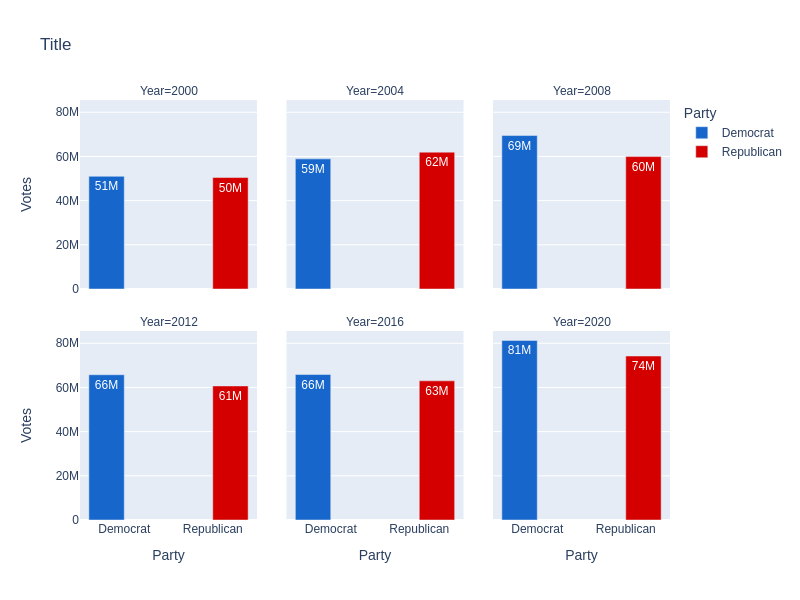

In [9]:
# bar graph of total votes faceted by election year
fig = px.bar(df.groupby(['year', 'party'])['candidatevotes'].agg('sum').reset_index(), x='party', y='candidatevotes'
             , color='party', color_discrete_map=party_colors
             , barmode='group'
             , facet_col='year'
             , facet_col_wrap=3
             , category_orders={'party': party_order}
             , text_auto='.2s'
             , facet_row_spacing=0.1
             , facet_col_spacing=0.05
             , width=800, height=600
             , title='Title'
             , labels={
                 'party': 'Party'
                 , 'year': 'Year'
                 , 'candidatevotes': 'Votes'
             }
            )
fig.show(renderer='png')

In [10]:
# each state's total number of votes by party
df_by_state = df.groupby(['year', 'state', 'state_po', 'party'])['candidatevotes'].sum().reset_index()
df_by_state

,year,state,state_po,party,candidatevotes
0,2000,Alabama,AL,Democrat,695602
1,2000,Alabama,AL,Republican,944409
2,2000,Alaska,AK,Democrat,79004
3,2000,Alaska,AK,Republican,167398
4,2000,Arizona,AZ,Democrat,685341
...,...,...,...,...,...
607,2020,West Virginia,WV,Republican,545382
608,2020,Wisconsin,WI,Democrat,1630673
609,2020,Wisconsin,WI,Republican,1610065
610,2020,Wyoming,WY,Democrat,73491


### 3. Visualize

In [11]:
# the party winner of each state (most votes)
df_state_winner = df_by_state.loc[df_by_state.groupby(['year', 'state', 'state_po'])['candidatevotes'].idxmax()]
df_state_winner.head()

,year,state,state_po,party,candidatevotes
1,2000,Alabama,AL,Republican,944409
3,2000,Alaska,AK,Republican,167398
5,2000,Arizona,AZ,Republican,781652
7,2000,Arkansas,AR,Republican,472940
8,2000,California,CA,Democrat,5861203


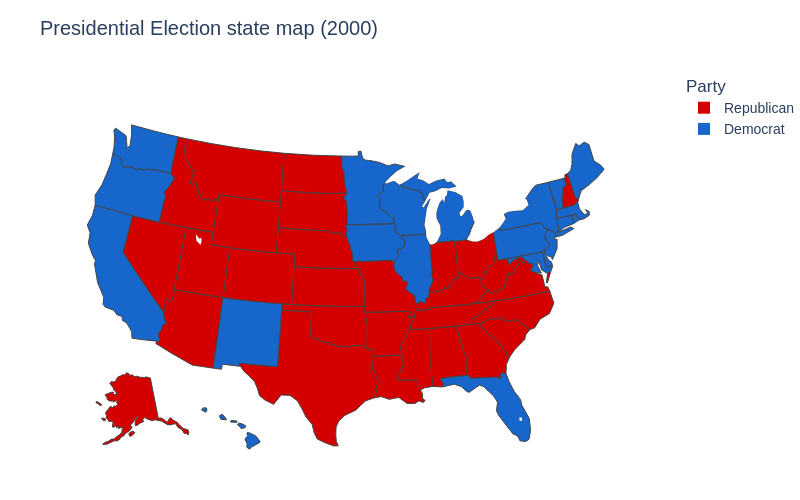

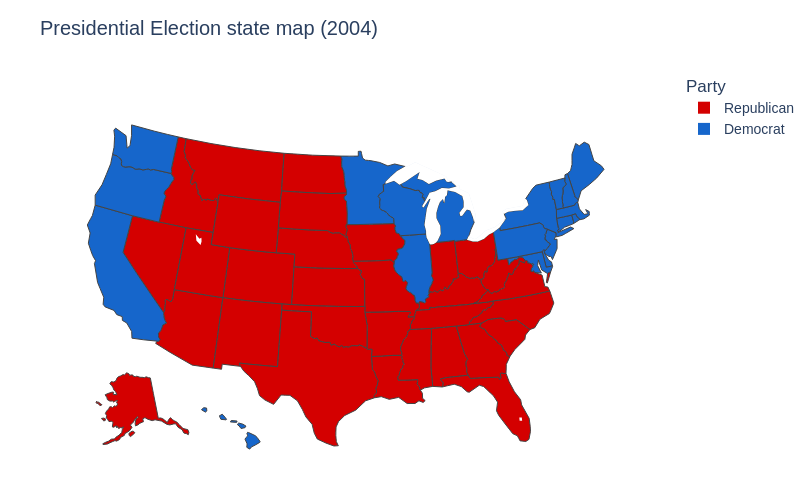

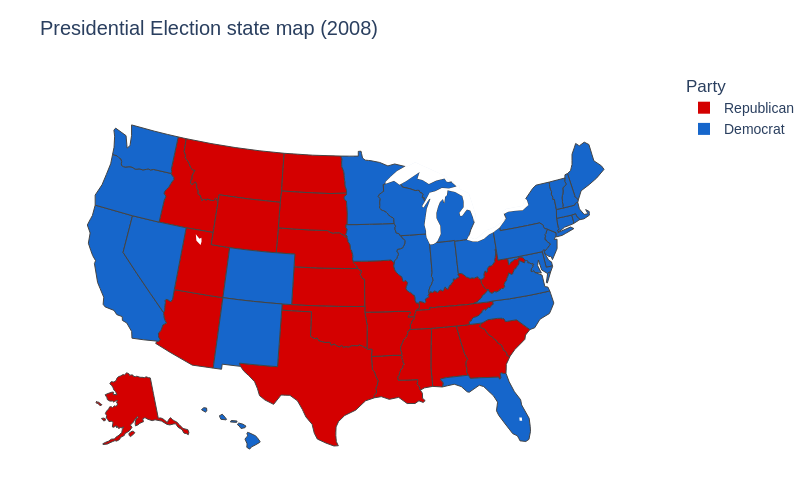

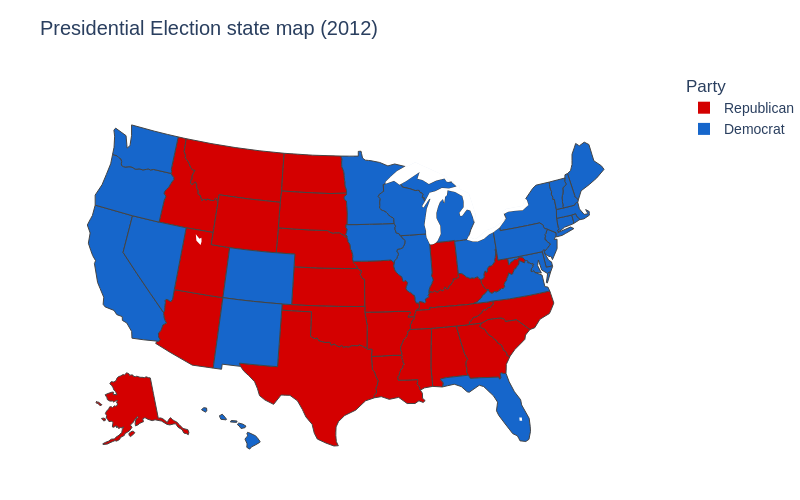

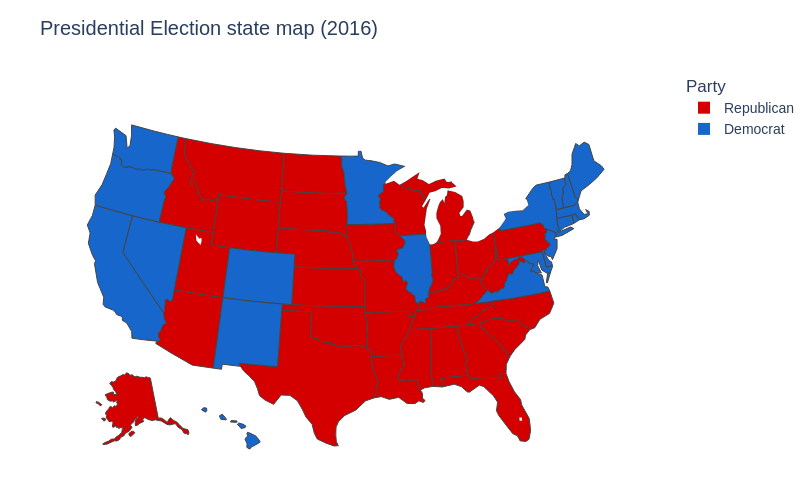

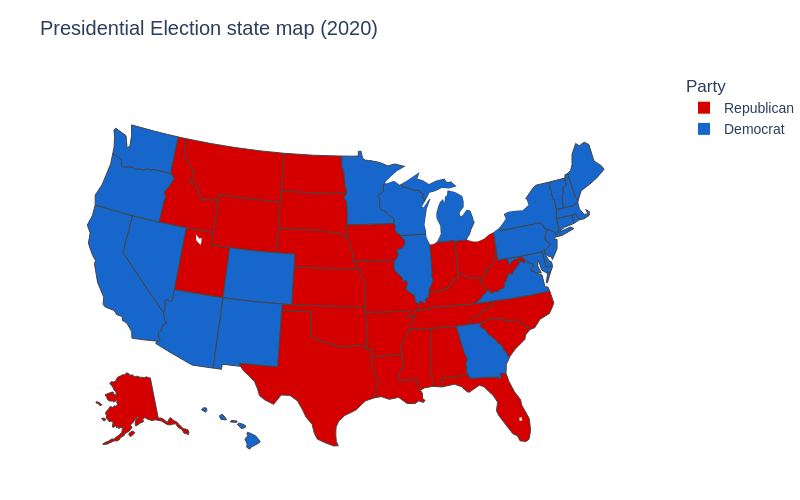

In [12]:
# choropleth map of each state's winner by year
for year in df_state_winner.year.unique():
    fig = px.choropleth(
        df_state_winner.query('year==' + str(year))
        , locations='state_po'
        , locationmode='USA-states'
        , color='party'
        , scope='usa'
        , color_discrete_map=party_colors
        , labels={ 'party': 'Party' }
        # , animation_frame='year'
        , hover_name='state'
        , hover_data= { 'year': False, 'state_po': False, 'party': True, 'candidatevotes': ':,' }
    )

    fig.update_layout(
        margin=dict(l=20, r=0, b=0, t=70, pad=0)
        , paper_bgcolor='white'
        , width=800
        , title_text=f'Presidential Election state map ({year})'
        , font_size=14
    )

    # fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
    # fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 1000

    # generate static image
    fig.write_image(f'images/us-presidential-election-state-map-{year}.png', width=800)

    fig.show(renderer='png', width=800)

#### Animation

![US Presidential election state map - 2000-2020](images/us-presidential-election-state-map-2000-2020.gif)

In [13]:
df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,Alabama,AL,Autauga,01001,US PRESIDENT,AL GORE,Democrat,4942,17208,2022-03-15,TOTAL
1,2000,Alabama,AL,Autauga,01001,US PRESIDENT,GEORGE W. BUSH,Republican,11993,17208,2022-03-15,TOTAL
4,2000,Alabama,AL,Baldwin,01003,US PRESIDENT,AL GORE,Democrat,13997,56480,2022-03-15,TOTAL
5,2000,Alabama,AL,Baldwin,01003,US PRESIDENT,GEORGE W. BUSH,Republican,40872,56480,2022-03-15,TOTAL
8,2000,Alabama,AL,Barbour,01005,US PRESIDENT,AL GORE,Democrat,5188,10395,2022-03-15,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
72608,2020,Wyoming,WY,Uinta,56041,US PRESIDENT,DONALD J TRUMP,Republican,7496,9459,2022-03-15,TOTAL
72609,2020,Wyoming,WY,Washakie,56043,US PRESIDENT,JOSEPH R BIDEN JR,Democrat,651,4032,2022-03-15,TOTAL
72612,2020,Wyoming,WY,Washakie,56043,US PRESIDENT,DONALD J TRUMP,Republican,3245,4032,2022-03-15,TOTAL
72613,2020,Wyoming,WY,Weston,56045,US PRESIDENT,JOSEPH R BIDEN JR,Democrat,360,3560,2022-03-15,TOTAL


In [14]:
# each county's total number of votes by party
df_by_county = df.groupby(['year', 'state', 'state_po', 'county_name', 'county_fips', 'party'])['candidatevotes'].sum().reset_index()
df_by_county

,year,state,state_po,county_name,county_fips,party,candidatevotes
0,2000,Alabama,AL,Autauga,01001,Democrat,4942
1,2000,Alabama,AL,Autauga,01001,Republican,11993
2,2000,Alabama,AL,Baldwin,01003,Democrat,13997
3,2000,Alabama,AL,Baldwin,01003,Republican,40872
4,2000,Alabama,AL,Barbour,01005,Democrat,5188
...,...,...,...,...,...,...,...
37849,2020,Wyoming,WY,Uinta,56041,Republican,7496
37850,2020,Wyoming,WY,Washakie,56043,Democrat,651
37851,2020,Wyoming,WY,Washakie,56043,Republican,3245
37852,2020,Wyoming,WY,Weston,56045,Democrat,360


In [15]:
# the party winner of each county (most votes)
df_county_winner = df_by_county.loc[df_by_county.groupby(['year', 'state', 'state_po', 'county_name', 'county_fips'])['candidatevotes'].idxmax()]
df_county_winner.head()

,year,state,state_po,county_name,county_fips,party,candidatevotes
1,2000,Alabama,AL,Autauga,01001,Republican,11993
3,2000,Alabama,AL,Baldwin,01003,Republican,40872
4,2000,Alabama,AL,Barbour,01005,Democrat,5188
7,2000,Alabama,AL,Bibb,01007,Republican,4273
9,2000,Alabama,AL,Blount,01009,Republican,12667


In [16]:
from urllib.request import urlopen
import json

# county fips geojson
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [ ]:
# choropleth map of each county's winner by year

for year in df_county_winner.year.unique():
    fig = px.choropleth_mapbox(
        df_county_winner.query('year==' + str(year))
        , geojson=counties
        , locations='county_fips'
        , color='party'
        , color_discrete_map=party_colors
        , mapbox_style='carto-positron'
        , zoom=2.8
        , center={ 'lat': 37.0902, 'lon': -95.7129 }
        , opacity=0.5
        , labels={ 'party': 'Party' }
        # , animation_frame='year'
        , hover_name='state'
        , hover_data= { 'year': False, 'state': False, 'state_po': False, 'county_name': True, 'county_fips': False, 'party': True, 'candidatevotes': ':,' }
    )

    fig.update_layout(
        # margin=dict(l=0, r=0, b=0, t=0)
        title_text=f'Presidential Election county map ({year})'
        , font_size=14
    )
    
    # generate static image
    # fig.write_image(f'images/us-presidential-election-county-map-{year}.png', width=800)

    fig.show(renderer='png', width=800)

#### Animation

![US Presidential election county map - 2000-2020](images/us-presidential-election-county-map-2000-2020.gif)